# 딥러닝 tensorflow+keras

## 처음에 시작하는거 잘 못들음

In [1]:
#python waring off
import warnings
warnings.filterwarnings('ignore')

#tensorflow waring off
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

import tensorflow as tf

## tensorflow

In [2]:
tf.__version__

'1.14.0'

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [13]:
np.random.normal(0,1)

-1.2951345727847425

In [12]:
my_data=[] #점임
for i in range(1000):
    x=np.random.normal(0,1) #0과 1 사이의 어떤 값 난수
    y=0.1 * x + np.random.normal(0, 0.05) #y=0.1*x+noise => 머신러닝 공식
    my_data.append([x,y]) #x,y는 점임

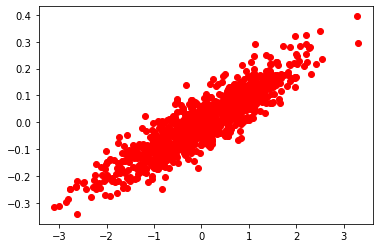

In [5]:
x_data = [ v[0] for v in my_data ] #점을 기준으로x와 y를 분류
y_data = [ v[1] for v in my_data ]
plt.plot(x_data, y_data, 'ro')
plt.show()

In [6]:
W=tf.Variable(tf.random_uniform([1],-1,1)) 
#random_uniform: 균등 분포를 준비하는 함수. -1과 1 사이의 난순발생, [1] 1차원
b=tf.Variable(tf.zeros([1])) #제로쓰: 0이채워짐. 공간 하나에 0이 채워짐

In [7]:
hypothesis=W*x_data+b #선을 찾고싶음. 기울기가 w이고 절편이 b y=Wx+b
cost=tf.reduce_mean(tf.square(hypothesis - y_data)) #제곱해서평균을 만든다. or 절댓값 사용
#평균(제곱(예측값-정답))
#이게 케라스에서의 mean square error

In [8]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.2)
#tf.train은 케라스에서 썼던 모든 optimizer가 다 있음. 
#learing rate: 너무 크면 튕겨져 나감. 산에서 공이 떨어질 때 너무 작으면 느리게 떨어져서 언제 
#도착할 지 모르고 너무 크면 빠르게 덜어져서 날라감.
#빨간색은 러닝 레이트가 큼, 파랑은 작음 , 핑크는 적당.
#학습 횟수는 10 곱한만큼 합 0.1,0.01,0.001....등등등...
train = optimizer.minimize(cost) #이 행동이 훈련


step= 0 ,W= [0.2644539] ,cost= 0.029984059


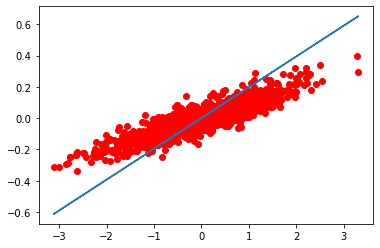

step= 1 ,W= [0.19716196] ,cost= 0.012004139


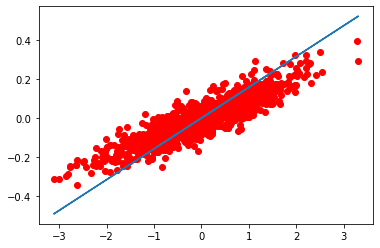

step= 2 ,W= [0.15758926] ,cost= 0.0057863714


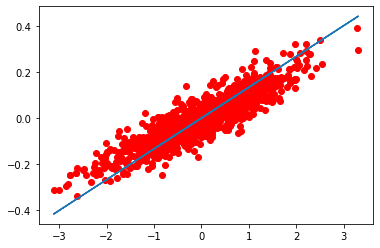

step= 3 ,W= [0.13431296] ,cost= 0.003634447


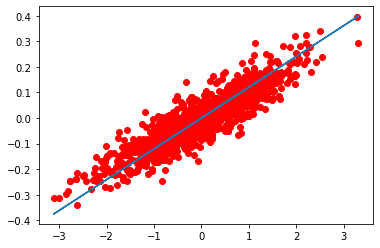

step= 4 ,W= [0.12061928] ,cost= 0.0028890658


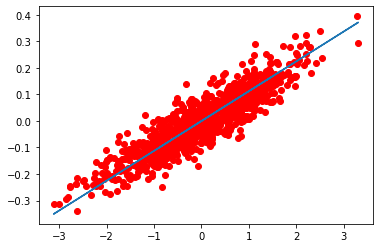

step= 5 ,W= [0.1125615] ,cost= 0.002630658


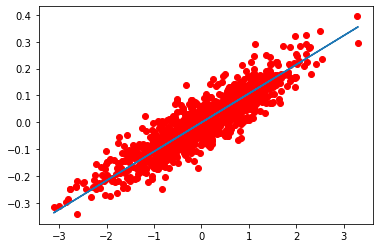

step= 6 ,W= [0.10781907] ,cost= 0.0025409951


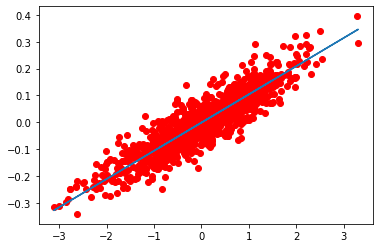

step= 7 ,W= [0.1050273] ,cost= 0.0025098543


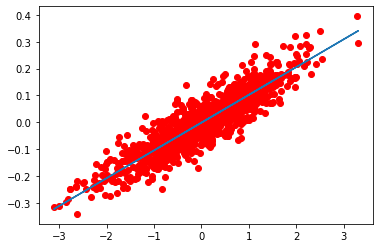

step= 8 ,W= [0.10338348] ,cost= 0.0024990293


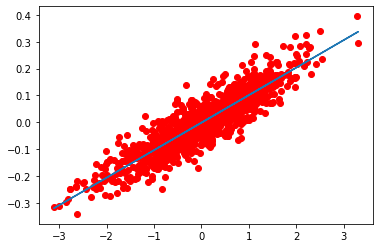

step= 9 ,W= [0.10241538] ,cost= 0.0024952616


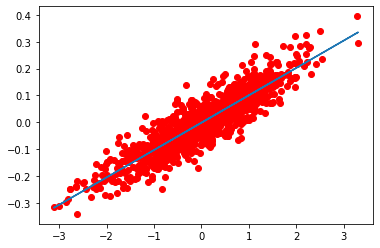

In [9]:
sess = tf.Session()
sess.run(tf.global_variables_initializer()) #글로벌 변수 리셋
for step in range(10): #10번학습
    print("step=", step, ",W=", sess.run(W), ",cost=", sess.run(cost))
    #학습 횟수는 얼마고 변수가 얼마나 떨어지고 그런거..
    sess.run(train)
    plt.plot(x_data,y_data,'ro')
    plt.plot(x_data,sess.run(W)*x_data+sess.run(b)) #Wx_b
    plt.show()
sess.close() #항상 close해줘야 함

### run()은?
range(10) 은 그냥 range(10)이지만
list(range(10)) 해주면 리스트. 그런 느낌이 run()

## keras

In [16]:
x=np.linspace(1,10,1000)
y=2*x+1 #y=W*x+b 10 이후의 수가 나오면 뭐가 나오겠니?

In [17]:
from keras.models import Sequential
from keras.layers import Dense

In [18]:
model=Sequential()

In [19]:
model.add(Dense(1, activation='linear',input_shape=(1,)))

In [20]:
model.compile(loss='mse',optimizer='sgd')
model.fit(x,y,epochs=20) #20번 학습. tensorflow보다 간단

Epoch 1/20
1000/1000 [==============================] - 0s 150us/step - loss: 17.6707
Epoch 2/20
1000/1000 [==============================] - 0s 21us/step - loss: 0.0243
Epoch 3/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.0192
Epoch 4/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.0153
Epoch 5/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.0123
Epoch 6/20
1000/1000 [==============================] - 0s 14us/step - loss: 0.0098
Epoch 7/20
1000/1000 [==============================] - 0s 14us/step - loss: 0.0077
Epoch 8/20
1000/1000 [==============================] - 0s 16us/step - loss: 0.0061
Epoch 9/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0048
Epoch 10/20
1000/1000 [==============================] - 0s 15us/step - loss: 0.0039
Epoch 11/20
1000/1000 [==============================] - 0s 14us/step - loss: 0.0031
Epoch 12/20
1000/1000 [==============================] - 0s 15us/step - 

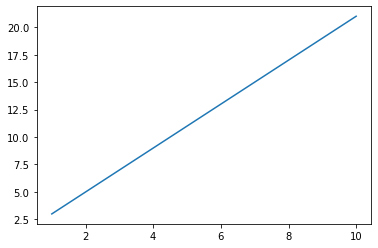

In [22]:
plt.plot(x,y)
plt.show() #y=2x+1

In [23]:
#새로운 값을 만들어서 예측
pred_x=[]
pred_x=np.append(pred_x,12)
pred_x=np.append(pred_x,14)
pred_x

array([12., 14.])

In [25]:
pred_y=model.predict(pred_x)
pred_y
#array([[25.034685],
#       [29.04765 ]], dtype=float32) 잘 맞춤

array([[25.034685],
       [29.04765 ]], dtype=float32)

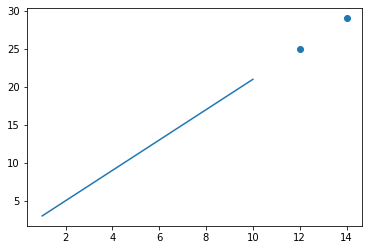

In [26]:
plt.plot(x,y)
plt.scatter(pred_x,pred_y)
plt.show()

In [28]:
#기울기와 절편 알고싶음
model.get_weights()
#[array([[2.0064816]], dtype=float32), array([0.9569047], dtype=float32)]
#         기울기                           y절편

[array([[2.0064816]], dtype=float32), array([0.9569047], dtype=float32)]